# Setup

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

report_file = '/var/data/wafer/wafer_test_1.xlsx'

bin_nm = 'Bin26'
filter_col = 'Op.'
filter_value = 'CP2'
detcol_nm = 'Tester'
detcol2_nm = 'P/C'

def add_bin_avg(table, attr, bin_avg):
    bin_curr_avg = 0
    if attr in output:
        bin_curr_avg = table[attr]
    table[attr] = bin_curr_avg + bin_avg
    

def sum_bin(row):
    bin_sum = 0
    for j in row.index:
        if 'Bin' in j:
            bin_sum = bin_sum+row[j]
    return bin_sum

# Load Data

In [2]:
sheet = pd.read_excel(io=report_file, header=8)

In [3]:
output={}

for i in sheet.index.values:
    row_data=sheet.loc[i]
    sum = sum_bin(row_data)
    if row_data[filter_col] == filter_value:
        bin_count = row_data[bin_nm]
        add_bin_avg(output, row_data[detcol_nm]+'_'+row_data[detcol2_nm], bin_count/sum)

output = sorted(output.items(), key=lambda d: d[0])


# Draw

<BarContainer object of 25 artists>

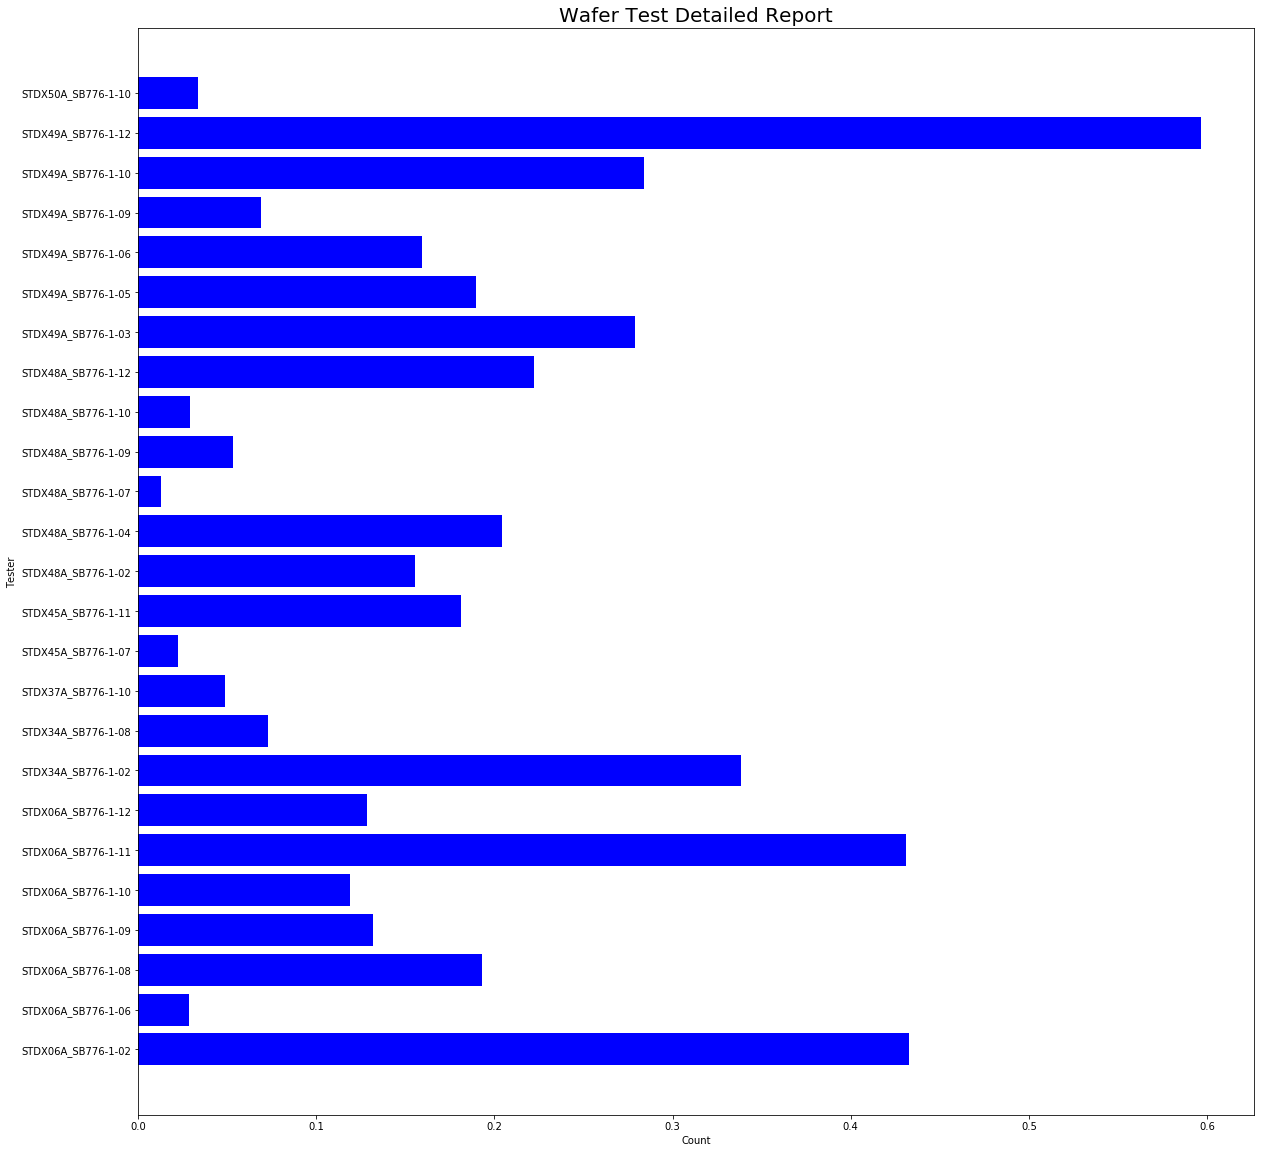

In [4]:
fig=plt.figure(figsize=(20,20))
subplt1=fig.add_subplot(1,1,1)
subplt1.set_title('Wafer Test Detailed Report', fontsize=20)
subplt1.set_xlabel('Count')
subplt1.set_ylabel(detcol_nm)

df = pd.DataFrame(output)
subplt1.barh(df[0], df[1], color='blue')
# subplt1.barh(list(output.keys()), list(output.values()), color='blue')